In [1]:
import requests
import os
import urllib.request
import pandas as pd
import seaborn as sns

In [2]:
#Install
!pip install umap-learn magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=ac24bc7a9a0b45d2d607630cc24aeccd9c31e84764159c7db44e9bcf0b0aa108
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=eeba012dfb5c7ba9c4ed971fa3a133efce178f46c21019a0e0ec6c7f559fba26
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be

In [3]:
import umap

In [4]:
url_proka = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/covid%20sample%20and%20T2D%20example%20dataset/proka_matrix_v1.txt'

In [5]:
urllib.request.urlretrieve(url_proka, 'proka_matrix_v1.txt')
os.listdir()
#!cd /content

['.config', 'proka_matrix_v1.txt', 'sample_data']

In [6]:

url_proka_tag = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/covid%20sample%20and%20T2D%20example%20dataset/mod_tabla_sample.txt'


In [7]:
urllib.request.urlretrieve(url_proka_tag, 'mod_tabla_sample.txt')
os.listdir()
!cd /content

In [8]:
complement_asvstable = pd.read_csv('/content/proka_matrix_v1.txt', delimiter = "\t",header=0).set_index('taxa').T

In [9]:
complement_asvstable

taxa,Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Abiotrophia,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Acetanaerobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acetobacter,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Acidaminococcaceae;Acidaminococcus,Bacteria;Actinobacteria;Actinobacteria;Propionibacteriales;Propionibacteriaceae;Acidipropionibacterium,Bacteria;Proteobacteria;Alphaproteobacteria;Rhodospirillales;Acetobacteraceae;Acidisoma,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Comamonadaceae;Acidovorax,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Moraxellaceae;Acinetobacter,...,Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Vagococcus,Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Veillonella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Verticia,Bacteria;Proteobacteria;Gammaproteobacteria;Vibrionales;Vibrionaceae;Vibrio,Bacteria;Lentisphaerae;Lentisphaeria;Victivallales;Victivallaceae;Victivallis,Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Peptostreptococcaceae_bacterium_oral_taxon_113_str._W5053,Bacteria;Firmicutes;Bacilli;Lactobacillales;Leuconostocaceae;Weissella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Burkholderiales_genera_incertae_sedis;Xylophilus,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Yersinia
sample_30099,0,0,0,0,0,0,3,0,0,0,...,0,0,73,0,0,0,0,114,0,0
sample_30104,0,0,0,0,0,0,0,0,0,0,...,0,0,110,0,0,0,0,77,0,0
sample_30114,0,0,0,0,0,0,0,0,0,0,...,0,0,13,0,0,0,0,363,0,0
sample_30170,0,0,0,0,0,0,0,0,0,0,...,0,0,355,0,0,0,0,0,0,0
sample_30189,0,0,0,0,0,0,0,0,0,0,...,0,0,90,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_75015,0,0,0,0,0,157,0,0,0,0,...,0,0,367,0,0,0,0,715,0,0
sample_75024,0,0,0,0,0,0,0,0,0,0,...,0,0,1854,0,0,0,0,11,0,0
sample_75029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sample_75041,0,0,0,0,0,0,0,0,0,0,...,0,0,83,0,0,0,0,0,0,0


In [10]:
sample_data = pd.read_csv('/content/mod_tabla_sample.txt', delimiter = "\t")
sample_data = sample_data.set_index('sample_id')
sample_data = sample_data['status']
sample_data = pd.DataFrame(sample_data)
sample_data_1 =  pd.DataFrame(sample_data)
sample_data

,status
sample_id,
sample_30099,healthy
sample_30104,healthy
sample_30114,IFG
sample_30170,IFG+IGT
sample_30189,T2D
...,...
sample_75015,IGT
sample_75024,IFG+IGT
sample_75029,healthy


In [11]:
sample_data= pd.Series(data=sample_data['status'])

In [12]:
clasesdic={"healthy":0,"IFG":1,"IGT":2,"IFG+IGT":3,"T2D":4,"T2D_treated":5}
sample_data_4umap= sample_data.map(clasesdic)

In [13]:
sample_data_4umap

sample_id
sample_30099    0
sample_30104    0
sample_30114    1
sample_30170    3
sample_30189    4
               ..
sample_75015    2
sample_75024    3
sample_75029    0
sample_75041    1
sample_75049    0
Name: status, Length: 430, dtype: int64

#**Microbiome data and mbPHENIX**

In [14]:
#GENERAL CODE OF mbPHENIX
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import umap
import time

def mbPHENIX(data, umap_data, t=10, decay=15, metric='euclidean', knn=10, return_type='both'):
    """
    This function applies a diffusion-based imputation method to microbiome data,
    utilizing UMAP (Uniform Manifold Approximation and Projection) as a low-dimensional representation
    instead of more traditional methods like PCA (Principal Component Analysis).

    Parameters
    ----------
    data: ndarray
        Original high-dimensional data representing microbial features across samples.
    umap_data: ndarray
        Low-dimensional data representation of microbiome samples using UMAP.
    t: int, default=10
        Parameter for the power to which the diffusion operator matrix is raised.
    decay: int, default=15
        Decay rate for the exponential function used to calculate the affinity matrix.
    metric: str, default='euclidean'
        Distance metric used to calculate the pairwise distance matrix.
    knn: int, default=10
        Number of nearest neighbours to consider when calculating the epsilon value.
    return_type: str, default='both'
        Controls what data is returned by the function.
        If 'both', both the imputed data and the Markov transition matrix are returned.
        If 'imputed', only the imputed data is returned.
        If 'markov', only the Markov transition matrix is returned.

    Returns
    -------
    Depending on 'return_type':
        'both' -> sc_PHENIX, new_matrix
        'imputed' -> sc_PHENIX
        'markov' -> new_matrix
    """

    print('calculating distances')
    # compute the pairwise distance matrix
    distance_matrix = pdist(umap_data, metric)
    distance_matrix = squareform(distance_matrix)

    n,m = distance_matrix.shape

    E = np.zeros((m,m))

    # sort the distances for each point
    knn_dst = np.sort(distance_matrix, axis=1)

    # get the distance to the knn-th nearest neighbour
    epsilon = knn_dst[:,knn]

    # scale the distance matrix
    pdx_scale = (distance_matrix / epsilon).T

    # calculate the affinity matrix
    E = np.exp(-1 * (pdx_scale ** decay))

    print(' afinity matrix done')

    # symmetrize the affinity matrix
    A = (E + E.T)

    # compute the degree matrix
    diff_deg = np.diag(np.sum(A,0))

    # compute the diffusion operator
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)

    # take the t-th power of the diffusion operator
    new_matrix =  np.linalg.matrix_power(diff_op, t)

    # propagate the original data using the diffusion operator
    data_new = np.array(np.dot(new_matrix,data))

    print('imputation')

    # calculate the imputed data
    Matix_col_genes_row_cell2 = (data +1) - data
    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2
    Matix_impu = Matix_col_genes_row_cell2 + data_new

    sc_PHENIX = Matix_impu

    print('done')
    end = time.ctime()
    print('done',end)

    if return_type == 'both':
        return sc_PHENIX, new_matrix
    elif return_type == 'imputed':
        return sc_PHENIX
    elif return_type == 'markov':
        return new_matrix
    else:
        raise ValueError("Invalid return_type. Expected one of: 'both', 'imputed', 'markov'")



def rescale_data(original_data, imputed_data, rescale_percent=99.99):
    """

    Rescales imputed data based on a percentile of the original data.

    This function takes two arrays: the original data prior to imputation and the data after imputation.
    It computes the specified rescale_percent percentile (default 99.99%) of the original data, and scales
    the imputed data so that its maximum values match this percentile. In cases where the calculated percentile
    value is 0, the maximum value is used for scaling instead.


    Parameters:
    ----------
    original_data : np.array
        Original data matrix that was used for imputation.

    imputed_data : np.array
        Imputed data matrix that needs to be rescaled.

    rescale_percent : float, optional
        The percentile of the original data that the imputed data should be rescaled to (default is 99.99).

    Returns:
    -------
    rescaled_data : np.array
        The rescaled imputed data.
    """
    M99_original = np.percentile(original_data, rescale_percent, axis=0)
    M100_original = original_data.max(axis=0)
    indices = np.where(M99_original == 0)[0]
    M99_original[indices] = M100_original[indices]

    M99_imputed = np.percentile(imputed_data, rescale_percent, axis=0)
    M100_imputed = imputed_data.max(axis=0)
    indices = np.where(M99_imputed == 0)[0]
    M99_imputed[indices] = M100_imputed[indices]

    max_ratio = np.divide(M99_original, M99_imputed)
    rescaled_data = np.multiply(imputed_data, np.tile(max_ratio, (len(original_data), 1)))

    return rescaled_data

import numpy as np
from scipy.spatial import distance

def put_zeros(imputed_matrix, raw_matrix, exp_markovian_matrix, k=20, threshold=3, keep_outliers=True):

    # Calculate Euclidean distances between all pairs of samples in exp_markovian_matrix
    distance_matrix = distance.squareform(distance.pdist(exp_markovian_matrix, 'euclidean'))

    # Get the dimensions of the imputed matrix
    num_rows, num_columns = imputed_matrix.shape

    # Create a copy of the imputed matrix
    copy = imputed_matrix.copy()

    # Iterate over each entry in the imputed matrix
    for i in range(num_rows):
        for j in range(num_columns):
            # Get the distances for this sample
            sample_distances = distance_matrix[i, :]

            # Find the k nearest neighbors (including the sample itself)
            nearest_neighbors = np.argsort(sample_distances)[:k+1]

            # Check if at least "threshold" samples among the nearest neighbors have non-zero values in the original matrix
            if (raw_matrix.iloc[nearest_neighbors, j] != 0).sum() < threshold:
                # If not, then replace the value with zero
                imputed_matrix.iloc[i, j] = 0

    if keep_outliers:
        for i in range(num_rows):
            for j in range(num_columns):
                # Get the distances for this sample
                sample_distances = distance_matrix[i, :]

                # Find the k nearest neighbors (including the sample itself)
                nearest_neighbors = np.argsort(sample_distances)[:k+1]

                # Check if at least "threshold" samples among the nearest neighbors have non-zero values in the original matrix
                if (raw_matrix.iloc[nearest_neighbors, j] != 0).sum() <= threshold:
                    # Find the samples coordinates in the raw_matrix that meet the condition
                    outlier_rows = np.nonzero(raw_matrix.iloc[nearest_neighbors, j].values != 0)[0]
                    outlier_cols = [j]

                    # Put back the respective value from the copy of imputed_matrix to the outliers
                    imputed_matrix.iloc[nearest_neighbors[outlier_rows], outlier_cols] = copy.iloc[nearest_neighbors[outlier_rows], outlier_cols]

    # Return the matrix with values replaced by zeros based on low frequency of occurrence
    return imputed_matrix


#**imputation mb-PHENIX in a surpervised manner**
this is just like sc-phenix https://doi.org/10.1101/2022.06.09.495525

In [15]:
complement_asvstable.index

Index(['sample_30099', 'sample_30104', 'sample_30114', 'sample_30170',
       'sample_30189', 'sample_30206', 'sample_30208', 'sample_30213',
       'sample_30220', 'sample_30221',
       ...
       'sample_31512', 'sample_31513', 'sample_31516', 'sample_31517',
       'sample_75007', 'sample_75015', 'sample_75024', 'sample_75029',
       'sample_75041', 'sample_75049'],
      dtype='object', length=430)

We added a synthetic taxon named "A" to the dataframe.






In [16]:
complement_asvstable['A'] = 0.0

In [17]:



"""
1) #add of remove fake taxon A abundance
complement_asvstable.loc['sample_30603', 'A']  = 1

complement_asvstable.loc['sample_30453', 'A']  = 0

2) #add of remove fake taxon A abundance

complement_asvstable.loc['sample_30603', 'A']  = 1

complement_asvstable.loc['sample_30453', 'A']  = 1


"""
#add of remove fake taxon A abundance
complement_asvstable.loc['sample_31114', 'A']  = 900
complement_asvstable.loc['sample_31386', 'A']  = 920
complement_asvstable.loc['sample_31302', 'A']  = 940
complement_asvstable.loc['sample_31184', 'A']  = 960
complement_asvstable.loc['sample_30837', 'A']  = 980
complement_asvstable.loc['sample_75015', 'A']  = 1000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


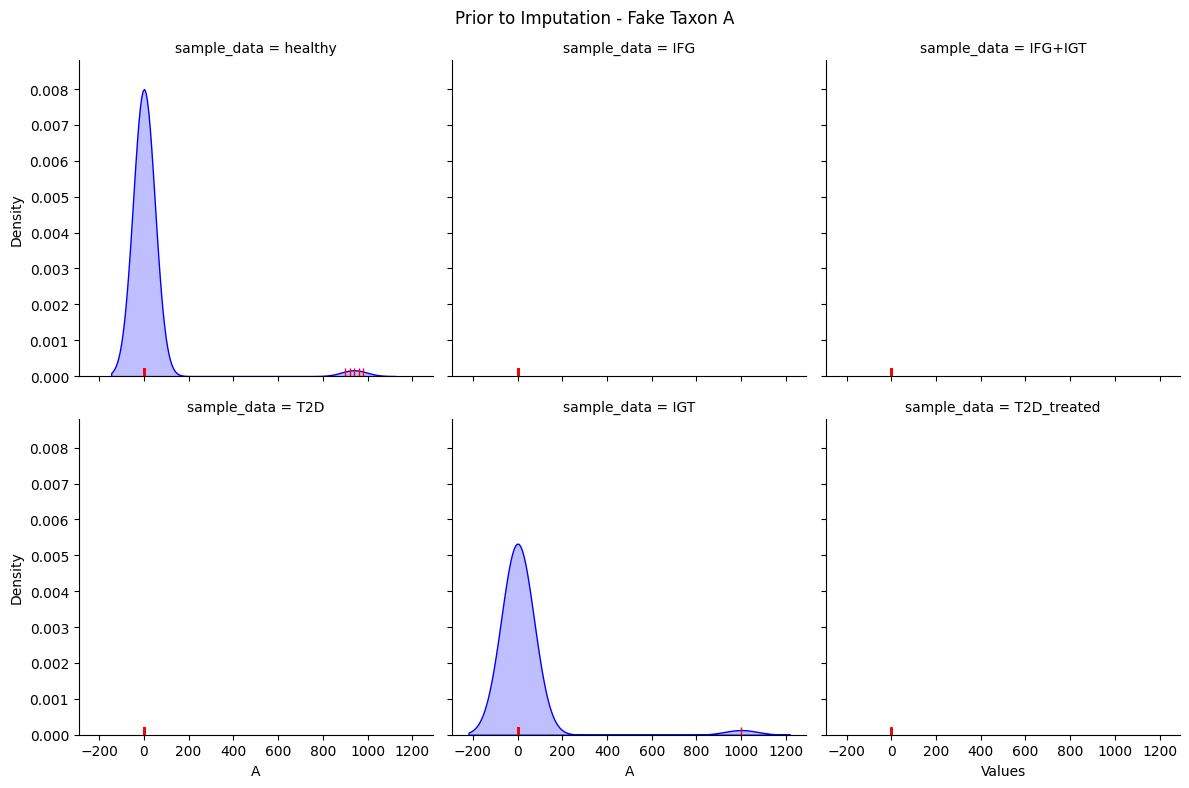

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that complement_asvstable is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': complement_asvstable['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True)
grid.map(sns.rugplot, 'A', color='r')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Prior to Imputation - Fake Taxon A')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [19]:
#for imputation
umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=500,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=0.9)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)
imputed_ALL = mbPHENIX(complement_asvstable, data_umap_vis_super, t=5,decay=5000,metric='euclidean',knn=17,return_type='imputed')

UMAP(angular_rp_forest=True, metric='cosine', n_components=10, n_epochs=500, n_neighbors=200, random_state=1, target_weight=0.9, verbose=True)
Wed Jul  5 22:38:53 2023 Construct fuzzy simplicial set
Wed Jul  5 22:38:55 2023 Finding Nearest Neighbors
Wed Jul  5 22:39:03 2023 Finished Nearest Neighbor Search
Wed Jul  5 22:39:11 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Jul  5 22:39:16 2023 Finished embedding
calculating distances
 afinity matrix done


<ipython-input-14-527dd838f132>:61: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * (pdx_scale ** decay))


imputation
done
done Wed Jul  5 22:39:17 2023


In [20]:
#for  visualization
umap_op = umap.UMAP(n_components=2, verbose=True,metric='cosine',n_epochs=500,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=0.9)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)

UMAP(angular_rp_forest=True, metric='cosine', n_epochs=500, n_neighbors=200, random_state=1, target_weight=0.9, verbose=True)
Wed Jul  5 22:39:17 2023 Construct fuzzy simplicial set
Wed Jul  5 22:39:17 2023 Finding Nearest Neighbors
Wed Jul  5 22:39:17 2023 Finished Nearest Neighbor Search
Wed Jul  5 22:39:17 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Jul  5 22:39:25 2023 Finished embedding


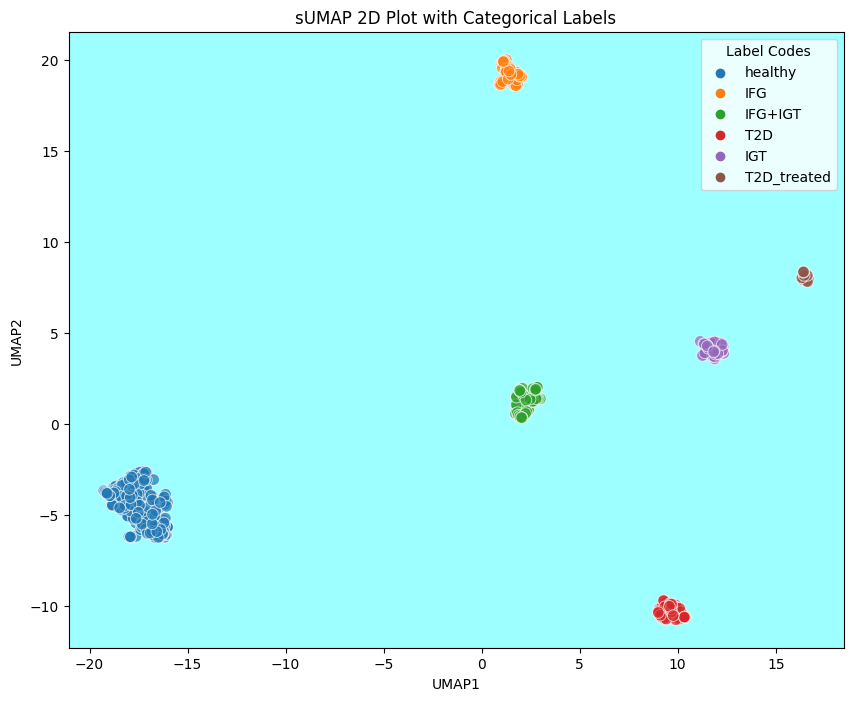

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the PCA data and label codes
umap_df = pd.DataFrame({'UMAP1': data_umap_vis_super[:, 0], 'UMAP2': data_umap_vis_super[:, 1], 'Label Codes': sample_data})

# Create a scatter plot with categorical labels
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Label Codes', palette='tab10', s=70, alpha=0.7)

# Customize the plot
plt.title('sUMAP 2D Plot with Categorical Labels')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue

# Show the plot
plt.show()


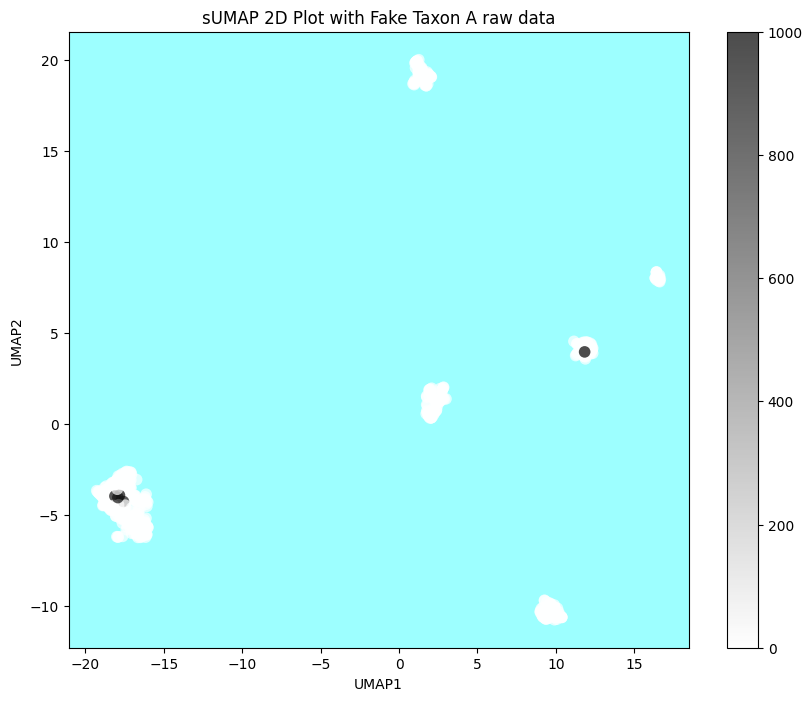

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=complement_asvstable['A'], cmap='gray_r', edgecolor='none', s=70, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A raw data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue

# Show the plot
plt.show()


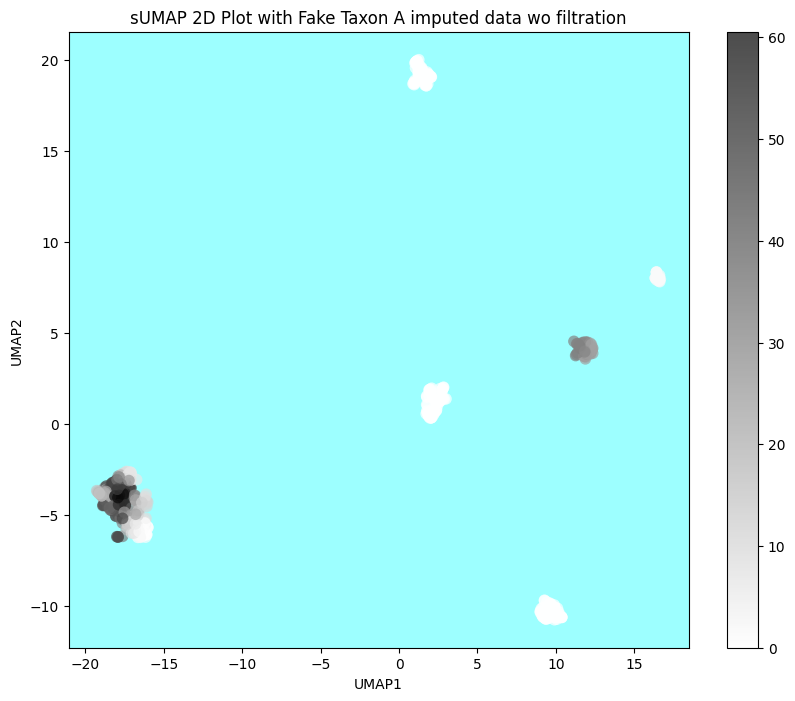

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=imputed_ALL['A'], cmap='gray_r', edgecolor='none', s=70, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A imputed data wo filtration')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


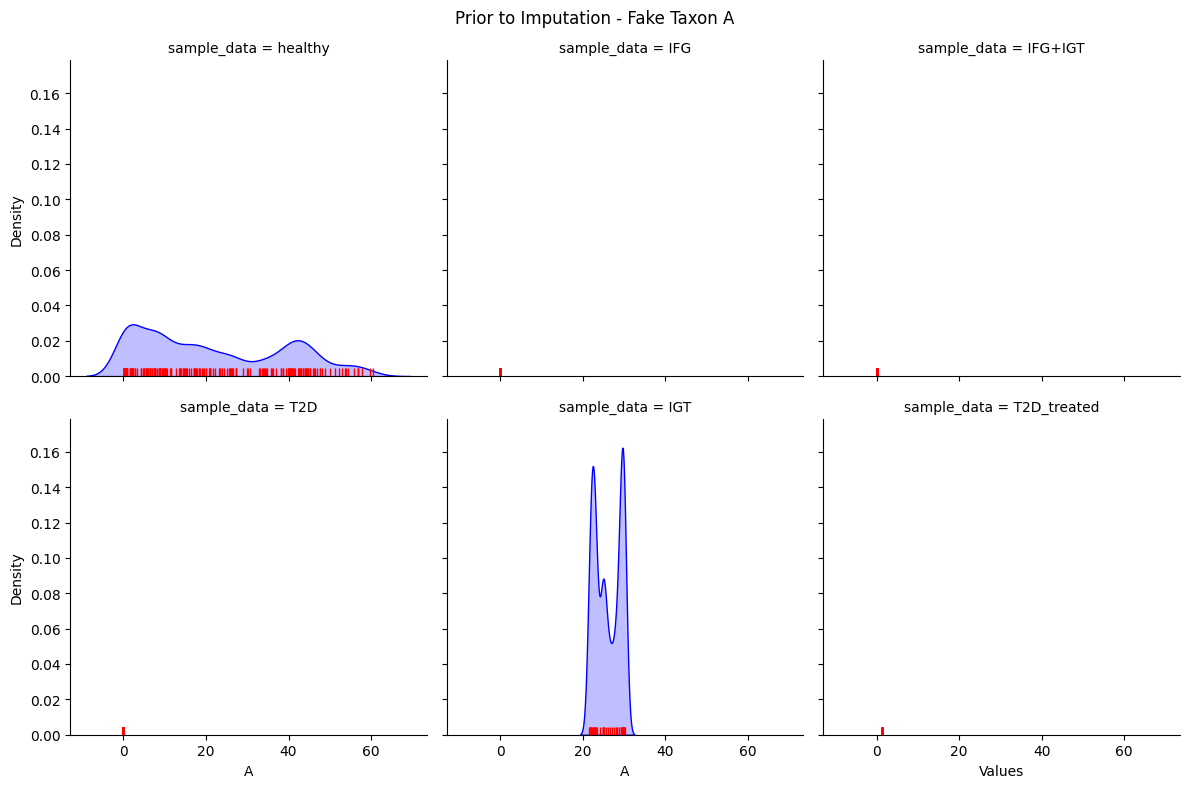

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that imputed_ALL is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': imputed_ALL['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the scaled KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True, bw_adjust=0.5)

# Map the rug plot to each column in the grid
grid.map(sns.rugplot, 'A', color='r')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Prior to Imputation - Fake Taxon A')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
"""
This only helps you to find the index or the label of each sample
# Create a DataFrame with the PCA data and label codes
umap_df = pd.DataFrame({'UMAP1': data_umap_vis_super[:, 0], 'UMAP2': data_umap_vis_super[:, 1], 'Label Codes':  imputed_ALL.index})

# Create a scatter plot using Plotly
fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Label Codes')
fig.update_layout(title='UMAP 2D Plot', xaxis_title='UMAP1', yaxis_title='UMAP2')
fig.show()
"""




"\nThis only helps you to find the index or the label of each sample\n# Create a DataFrame with the PCA data and label codes\numap_df = pd.DataFrame({'UMAP1': data_umap_vis_super[:, 0], 'UMAP2': data_umap_vis_super[:, 1], 'Label Codes':  imputed_ALL.index})\n\n# Create a scatter plot using Plotly\nfig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Label Codes')\nfig.update_layout(title='UMAP 2D Plot', xaxis_title='UMAP1', yaxis_title='UMAP2')\nfig.show()\n"

#Putative biological zeros

 it is necessary to filter out the smallest values that can be interpreted as "biological zeros".

However, it’s important to be cautious. In practice, due to multiple steps involved in the imputation via diffusion, it is possible to end up with a small non-zero value. This small non-zero value is coming from **outliers** (a.k.a. infrequent abundance in samples) or **frecuent values of data that has a low magnitude**.
<br>
 vb
One might mistakenly consider small non-zero values to be a non-biological zero resulting from real missing taxa, but this is incorrect, the distribution of the data after and befor imptuation need to be analysed or even in proyections with 2D UMAP. This in order to decide if is a outlier o frecuent values with low magnitude.
<br>

Such small non-zero values effectively remain biological zeros when there are outliers. Consequently, we advise not solely focusing on the absolute values post-imputation but also considering relative values or distributions to make a more accurate assessment (web: https://dburkhardt.github.io/post/2018-10-28-magic/).
<br>


For example, you can visualize the distribution of a taxon both before and after the diffusion process to examine its abundance distribution. By comparing these visualizations, you can assess whether the taxon can be classified as a "biological zero" or not, based on its frequency of occurrence. Then assigning a thershold, as we showe next


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


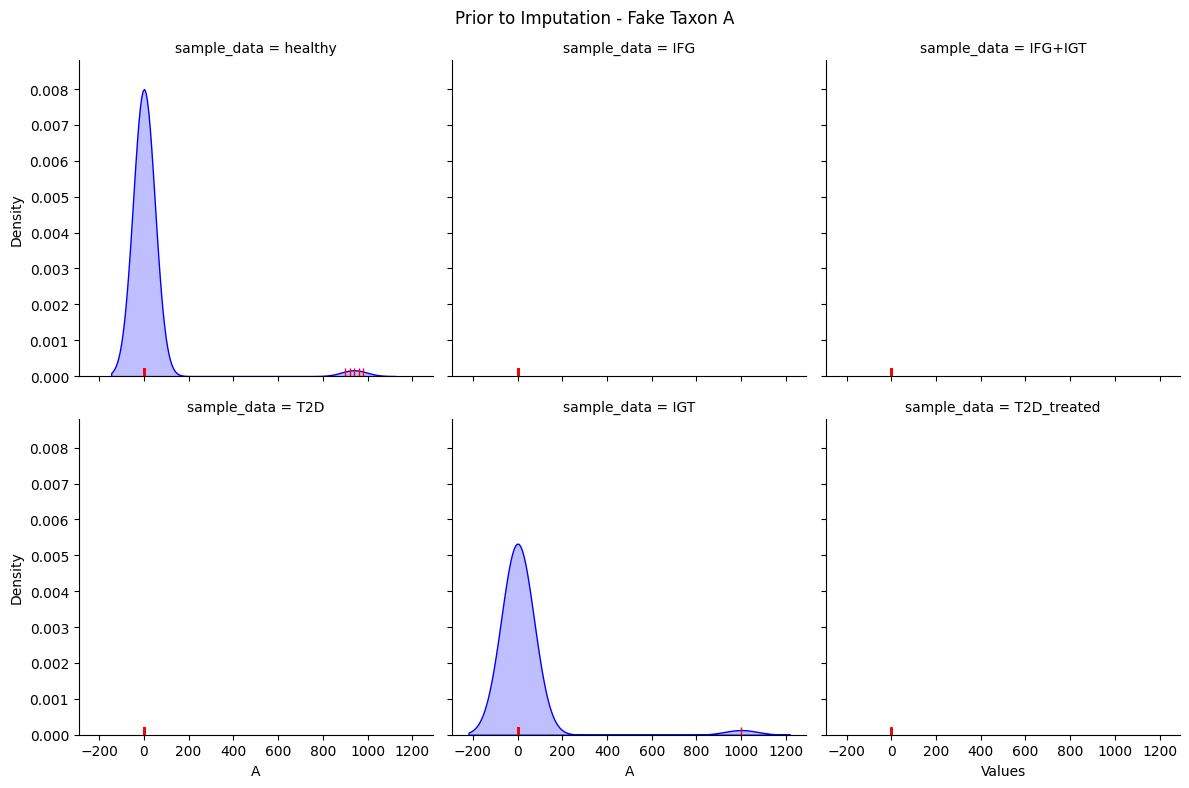

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that complement_asvstable is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': complement_asvstable['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True)
grid.map(sns.rugplot, 'A', color='r')


# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Prior to Imputation - Fake Taxon A')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Manual filterting



Based on the analysis of the sUMAP projection and the kernel density plots, it is evident that the abundance expression of Fake Taxon A can be "seems" to effectively recovered in the "healthy" class. One could think that this conclusion is supported by the presence of five nearest neighbor samples that exhibit a close clustering pattern, indicating a consistent expression of Fake Taxon A within this class.

The (only one)low frequency of Fake Taxon A among local samples in the "IGT" class indicates a potential deviation from the expected pattern. By removing outliers or low-frequency occurrences in this class, we can improve the accuracy of the abundance recovery process.

To address this, it is advisable to apply a manual filtration that filters out the "IGT" class. Taking into account bouth distribution prior and posterior imputation.

We can manually infer a global threshold for all samples of Fake Taxon A. In this particular case, we can set a threshold of 30, considering any abundance value below this threshold as a biological zero.

While the example we discussed is relatively simple, in more complex scenarios with intricate distribution patterns, visually inferring the nearest neighbor samples and examining the taxon's distributions and magnitudes may not provide a definitive answer regarding which samples can be considered imputable zeros and which ones cannot. This process can be time-consuming and challenging.

To tackle this challenge, we have developed a filtration function. This function automates the process of identifying and filtering out potential imputable zeros based on predetermined criteria or statistical techniques. By applying the filtration function, we can streamline and improve the accuracy of identifying imputable and unimputable zeros in more complex scenarios.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


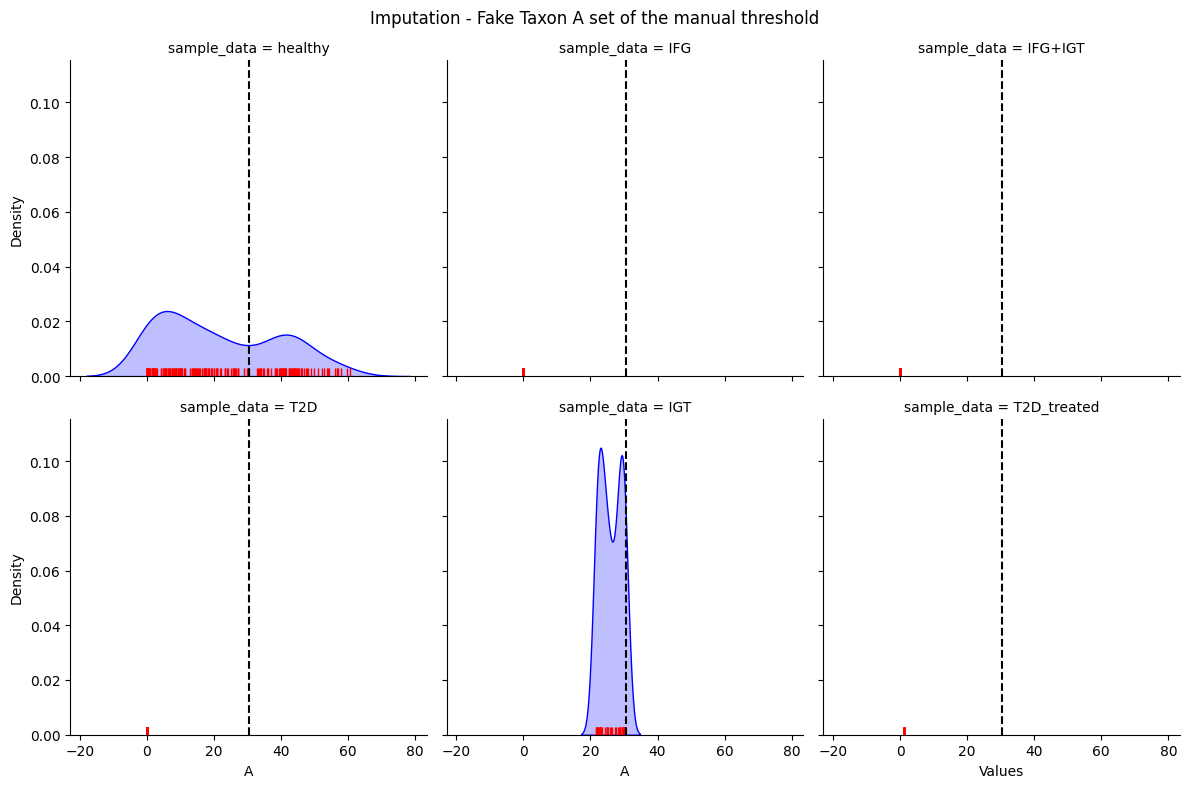

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that complement_asvstable is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': imputed_ALL['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True)
grid.map(sns.rugplot, 'A', color='r')


# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Imputation - Fake Taxon A set of the manual threshold')
# Add a line in the x-axis
for ax in grid.axes:
    ax.axvline(x=30.5, color='black', linestyle='--')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()





/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_

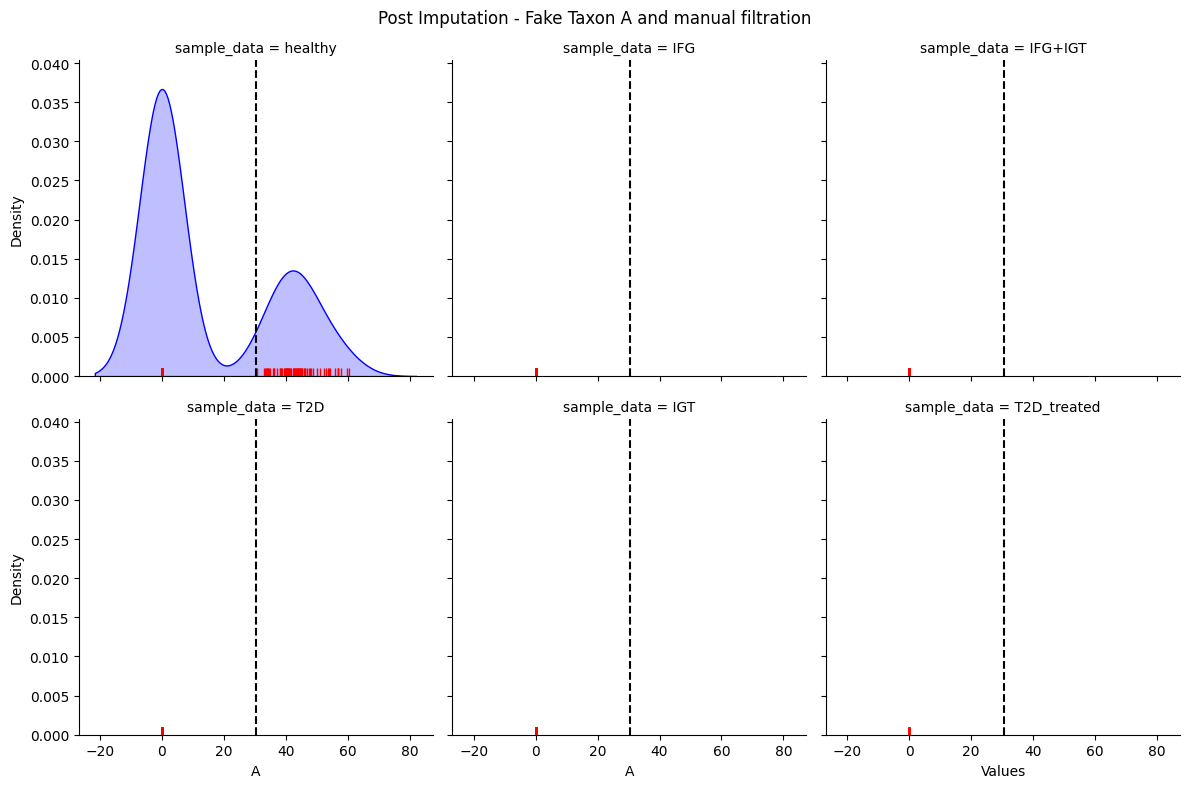

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that imputed_ALL is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Replace values less than 32 with 0 in the 'A' column
imputed_ALL.loc[imputed_ALL['A'] < 30.5, 'A'] = 0

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': imputed_ALL['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True)
grid.map(sns.rugplot, 'A', color='r')

# Add a line in the x-axis
for ax in grid.axes:
    ax.axvline(x=30.5, color='black', linestyle='--')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Post Imputation - Fake Taxon A and manual filtration')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


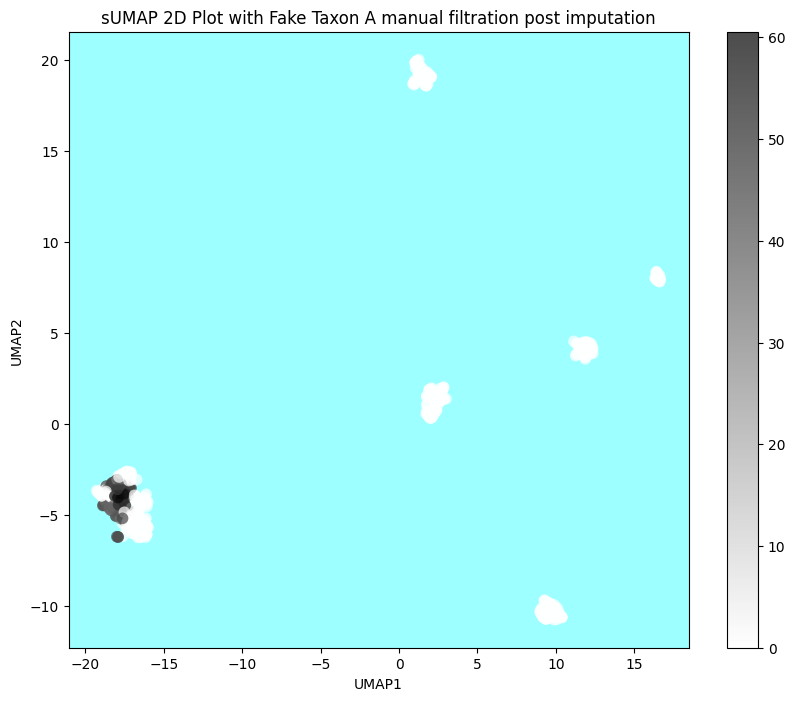

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=imputed_ALL['A'], cmap='gray_r', edgecolor='none', s=70, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A manual filtration post imputation')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue

# Show the plot
plt.show()

#Filtration Function

In [30]:
umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=500,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=0.9)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)
imputed_ALL_1,Mt = mbPHENIX(complement_asvstable, data_umap_vis_super, t=5,decay=5000,metric='euclidean',knn=17,return_type='both')

UMAP(angular_rp_forest=True, metric='cosine', n_components=10, n_epochs=500, n_neighbors=200, random_state=1, target_weight=0.9, verbose=True)
Wed Jul  5 22:39:39 2023 Construct fuzzy simplicial set
Wed Jul  5 22:39:39 2023 Finding Nearest Neighbors
Wed Jul  5 22:39:39 2023 Finished Nearest Neighbor Search
Wed Jul  5 22:39:39 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Jul  5 22:39:42 2023 Finished embedding
calculating distances
 afinity matrix done
imputation
done
done Wed Jul  5 22:39:42 2023


<ipython-input-14-527dd838f132>:61: RuntimeWarning: overflow encountered in power
  E = np.exp(-1 * (pdx_scale ** decay))


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


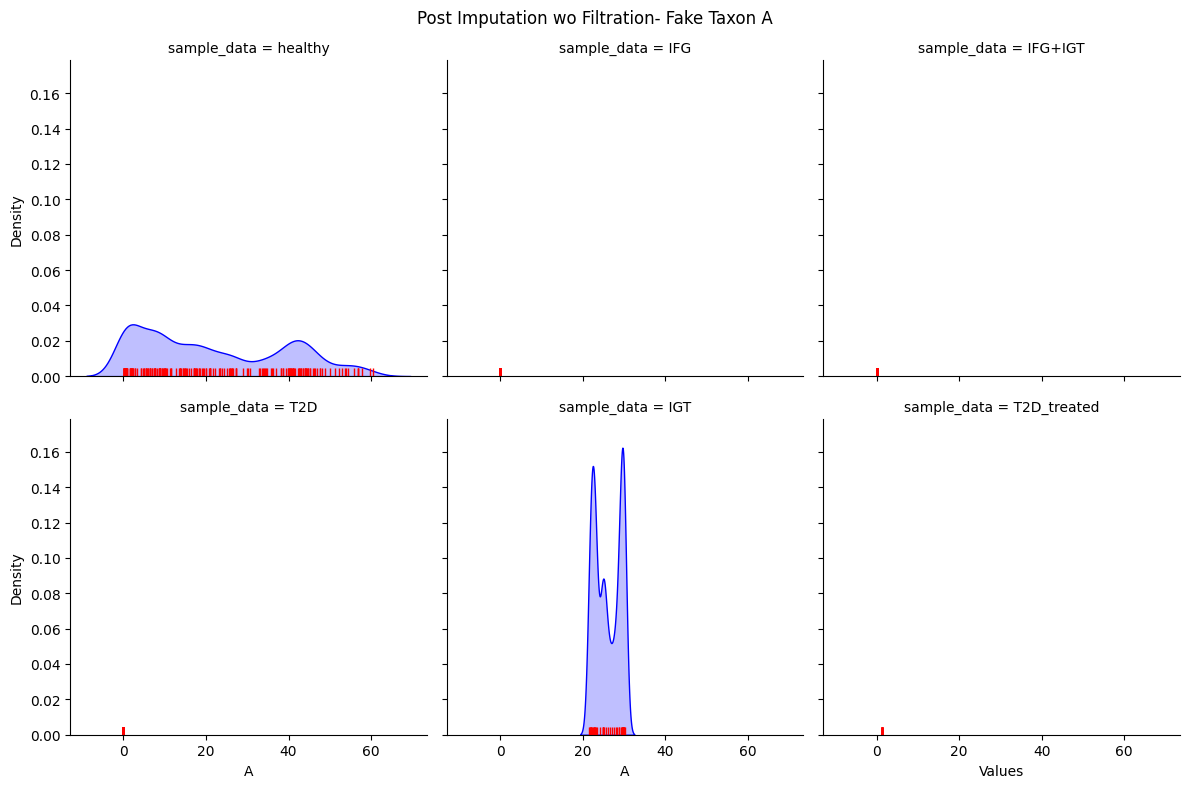

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that imputed_ALL is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': imputed_ALL_1['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the scaled KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True, bw_adjust=0.5)

# Map the rug plot to each column in the grid
grid.map(sns.rugplot, 'A', color='r')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Post Imputation wo Filtration- Fake Taxon A')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
fiiltrated_not_keep_outliers=  put_zeros(imputed_ALL_1, complement_asvstable, Mt, k=30, threshold=2, keep_outliers=False)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_

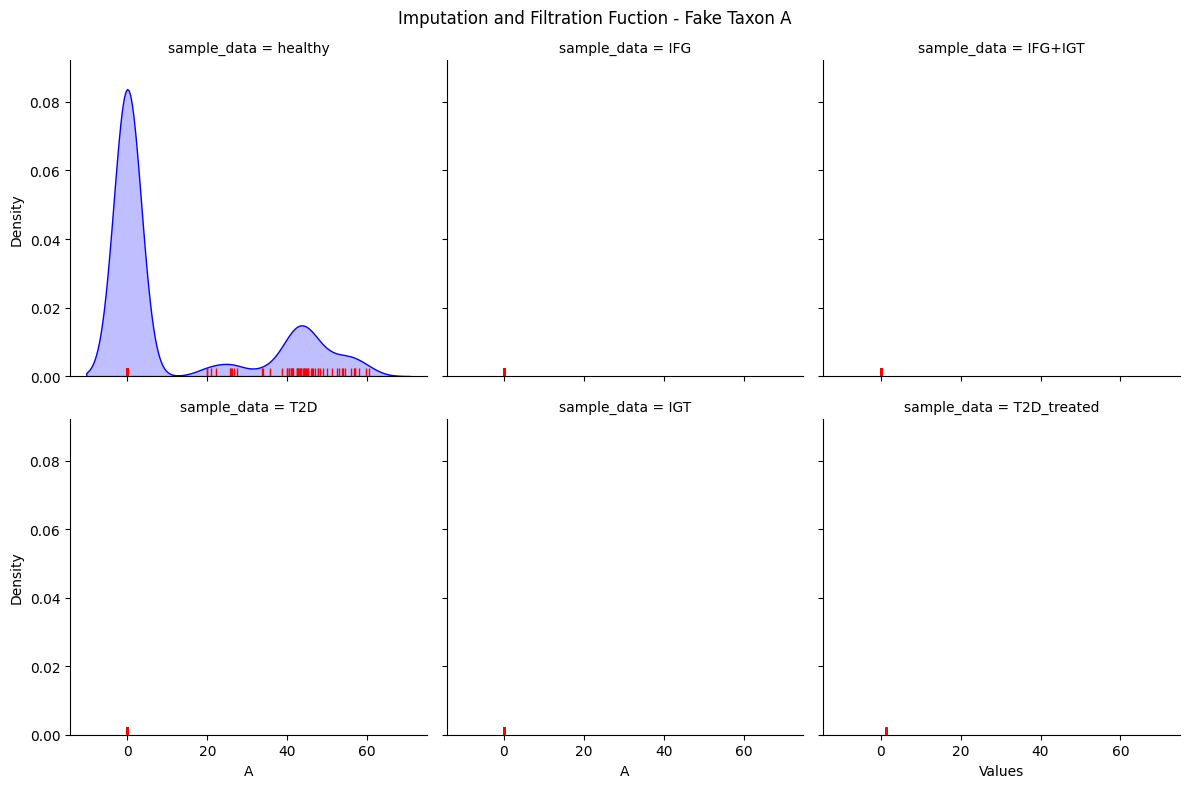

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that imputed_ALL is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': fiiltrated_not_keep_outliers['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the scaled KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True, bw_adjust=0.5)

# Map the rug plot to each column in the grid
grid.map(sns.rugplot, 'A', color='r')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Imputation and Filtration Fuction - Fake Taxon A')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


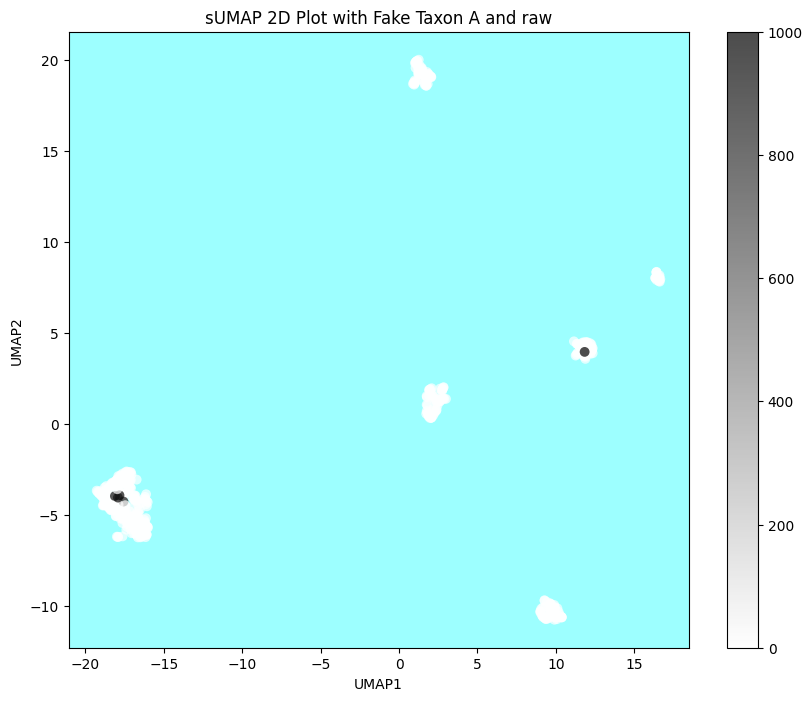

In [34]:
# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=complement_asvstable['A'], cmap='gray_r', edgecolor='none', s=50, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A and raw')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue

# Show the plot
plt.show()

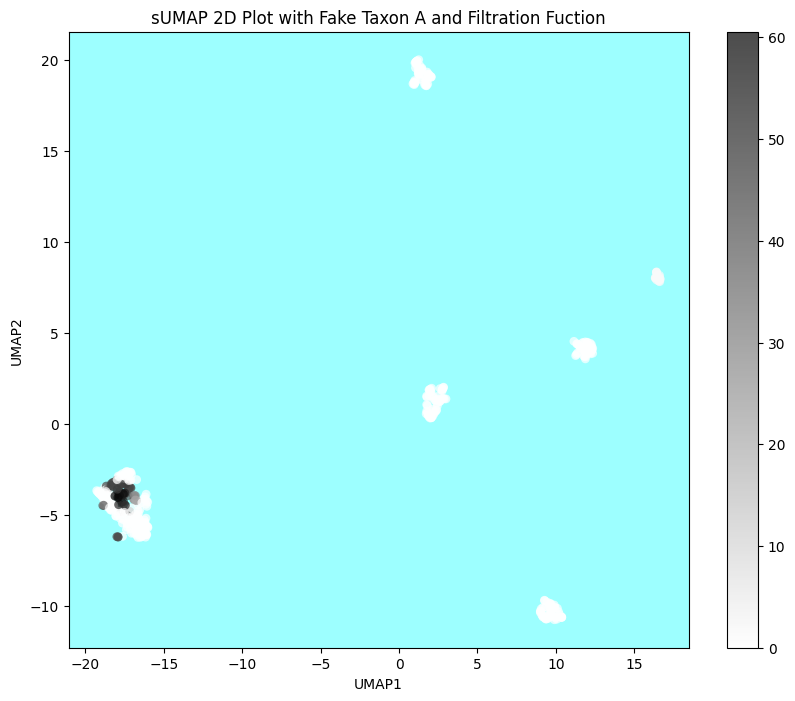

In [35]:
# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=fiiltrated_not_keep_outliers['A'], cmap='gray_r', edgecolor='none', s=40, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A and Filtration Fuction')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue

# Show the plot
plt.show()

#imputed data can be re-scaled as the original manitude before imputation


Imputation via diffusion is a technique that redistributes values by spreading them out while maintaining the total sum constant among knn-samples on the manifold of the exponantiated Markov matrix.
<br>

In a related study by David et al., they proposed a scaling method based on the 99th percentile. However, before applying this scaling method, it is necessary to filter out the smallest values that can be interpreted as "biological zeros". This filtration step was performed in the previous section of the code.
<br>

Overall, imputation via diffusion and subsequent scaling based on the 99th percentile offer a way to address missing values and adjust the distribution of data in a meaningful manner.

<br>

However, it’s important to be cautious. In practice, due to multiple steps involved in the imputation via diffusion, it is possible to end up with a small non-zero value. This small non-zero value is coming from outliers (a.k.a. infrequent abundance in samples). One might mistakenly consider this to be a non-biological zero resulting from dropout, but this is incorrect.
<br>

Such small non-zero values effectively remain biological zeros. Consequently, we advise not solely focusing on the absolute values post-imputation but also considering relative values or distributions to make a more accurate assessment (web: https://dburkhardt.github.io/post/2018-10-28-magic/).
<br>


For example, you can visualize the distribution of a taxon both before and after the diffusion process to examine its abundance distribution. By comparing these visualizations, you can assess whether the taxon can be classified as a "biological zero" or not, based on its frequency of occurrence.


<br>

David van Dijk, et al. Recovering Gene Interactions from Single-Cell Data Using Data Diffusion. 2018. Cell.


In [36]:
rescaled =  rescale_data(complement_asvstable, fiiltrated_not_keep_outliers, rescale_percent=99.99)


<ipython-input-14-527dd838f132>:141: RuntimeWarning: divide by zero encountered in true_divide
  max_ratio = np.divide(M99_original, M99_imputed)


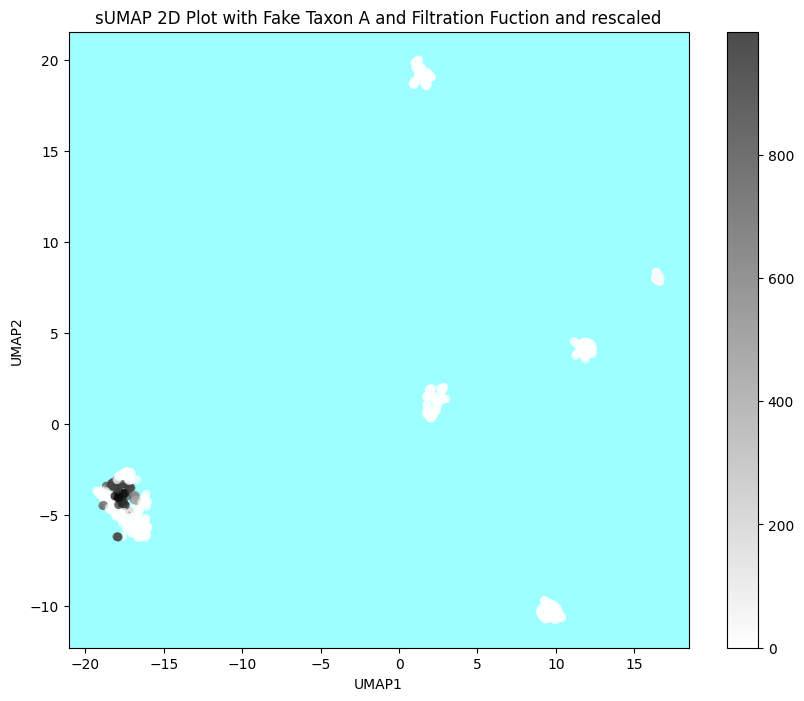

In [37]:
# Create a scatter plot with continuous color mapping and smaller points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=rescaled['A'], cmap='gray_r', edgecolor='none', s=40, alpha=0.7)
plt.colorbar(scatter)

# Customize the plot
plt.title('sUMAP 2D Plot with Fake Taxon A and Filtration Fuction and rescaled')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.gca().set_facecolor('#9DFFFF')  # Set background color to blue

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_

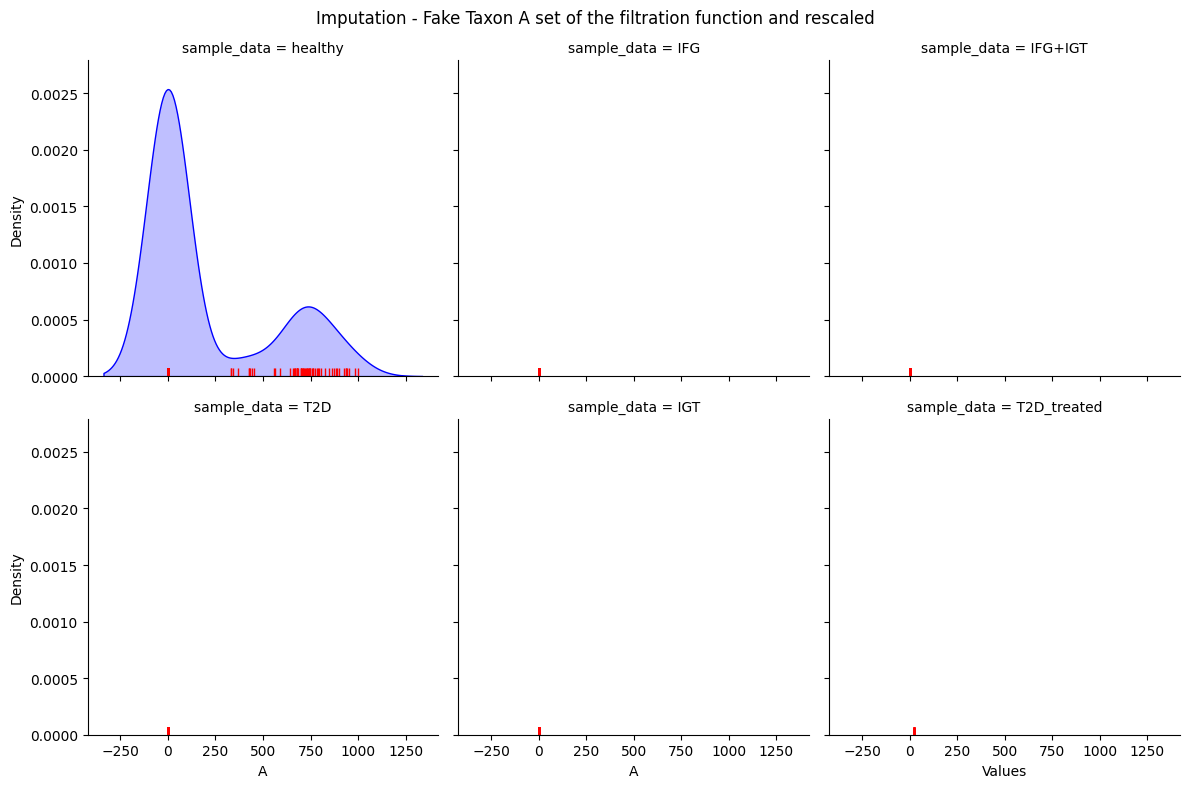

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that complement_asvstable is your DataFrame with data.
# Assuming that sample_data is a separate NumPy array or list containing the class labels.

# Create a new DataFrame with the columns 'A' and 'sample_data'
data = {'A': rescaled['A'], 'sample_data': sample_data}
df = pd.DataFrame(data)

# Create a FacetGrid with the 'sample_data' as the column variable
grid = sns.FacetGrid(df, col='sample_data', col_wrap=3, height=4)

# Map the KDE plot to each column in the grid
grid.map(sns.kdeplot, 'A', color='b', fill=True)
grid.map(sns.rugplot, 'A', color='r')


# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.suptitle('Imputation - Fake Taxon A set of the filtration function and rescaled')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


